# July 2023 Cu-G

dTHF + LiBF4 + dEtOH



In [1]:
import sys
import os
import json
sys.path.append(os.path.expanduser('~/git/analysis_playground/bayesian-fitting'))
sys.path.append(os.path.expanduser('~/git/nh3-analysis'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
try:
    from bumps import dream
    import fit_uncertainties
    importlib.reload(fit_uncertainties)
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

import summary_plots

In [2]:
project_dir = os.path.expanduser('~/git/nh3-analysis/july2023/')

# Auto-reduction directory
ar_dir = '/SNS/REF_L/IPTS-30384/shared/autoreduce/'

# Directory with fit results
fit_dir = os.path.expanduser(os.path.join(project_dir, 'dyn-fitting'))

# Directory where the time-resolved data is found
dyn_data_dir = '/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-G/30s'

dynamic_run = 207201 # Cycle 1

# Directory where to store time-resolved fit results
dyn_fit_dir = os.path.join(fit_dir, '%s-dyn/results-30s-bck' % dynamic_run)



## Summary of 60 Hz data

/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207194/__model-profile.dat
/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207202/__model-profile.dat


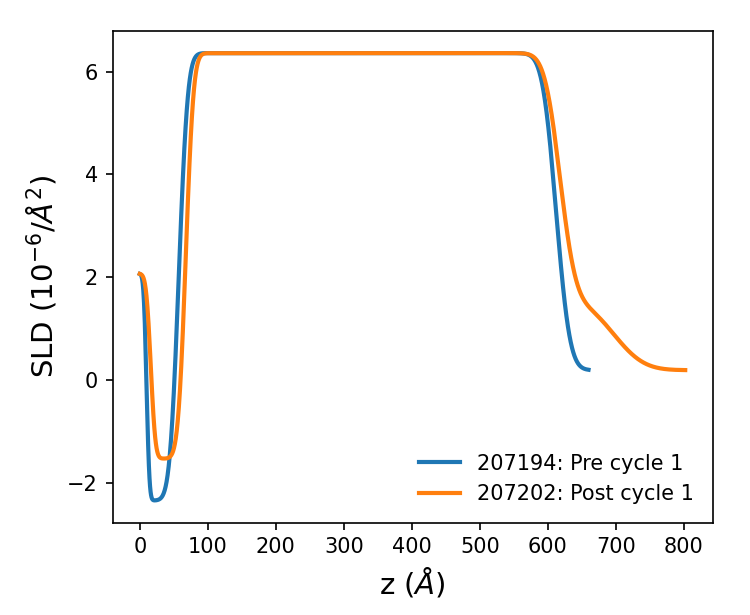

In [3]:
importlib.reload(summary_plots)
    
fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

summary_plots.plot_sld(207194, "207194: Pre cycle 1", fit_dir=fit_dir, show_cl=False)
summary_plots.plot_sld(207202, "207202: Post cycle 1", fit_dir=fit_dir, show_cl=False)

plt.legend(loc='lower right', frameon=False, fontsize=10)
plt.xlabel('z ($\AA$)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.show()


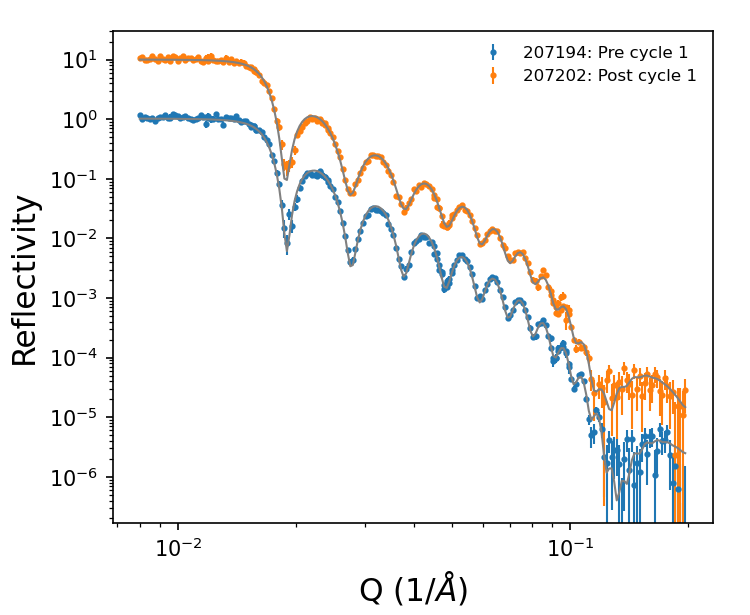

In [4]:
importlib.reload(summary_plots)

fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

multiplier = 10
scale = 1
summary_plots.plot_fit(207194, '207194: Pre cycle 1', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier
summary_plots.plot_fit(207202, '207202: Post cycle 1', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier

plt.legend(frameon=False, prop={'size': 8})
plt.xlabel('Q ($1/\AA$)', fontsize=15)
plt.ylabel('Reflectivity', fontsize=15)
plt.yscale('log')
plt.xscale('log')


## CP 1: Change as a function of time

/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-G/30s
23
Ref r207201_t000000.txt
Skipped: 0


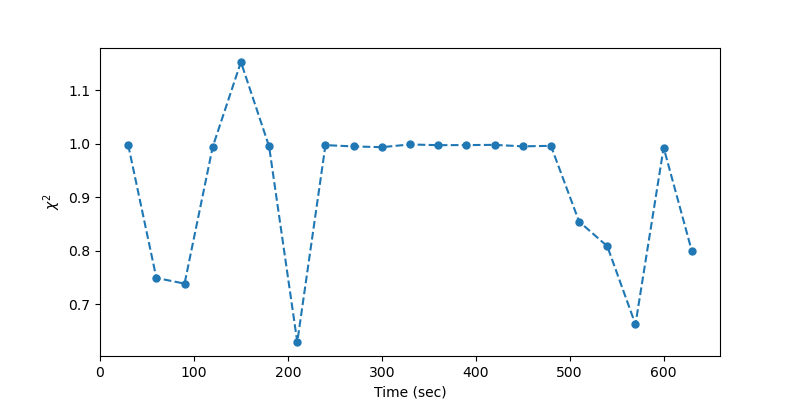

In [5]:
importlib.reload(summary_plots)
print(dyn_data_dir)
chi2 = summary_plots.detect_changes(207201, dyn_data_dir, first=0, last=-1, out_array=None)

## CP 2: Change as a function of time

/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-G/30s
39
Ref r207209_t000000.txt
Skipped: 0


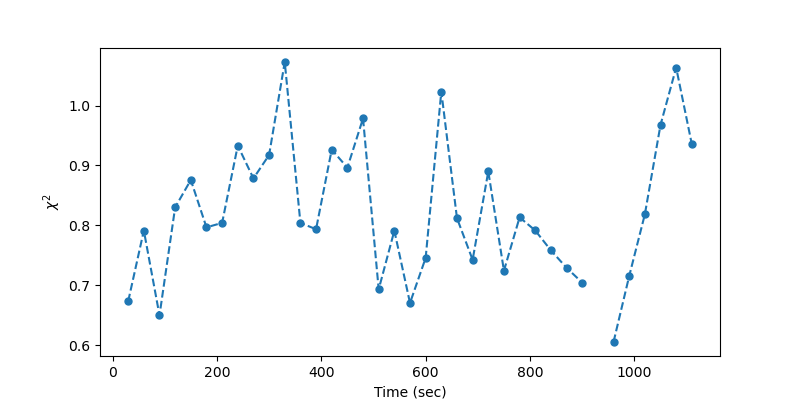

In [6]:
print(dyn_data_dir)
chi2 = summary_plots.detect_changes(207209, dyn_data_dir, first=0, last=-1, out_array=None)

23


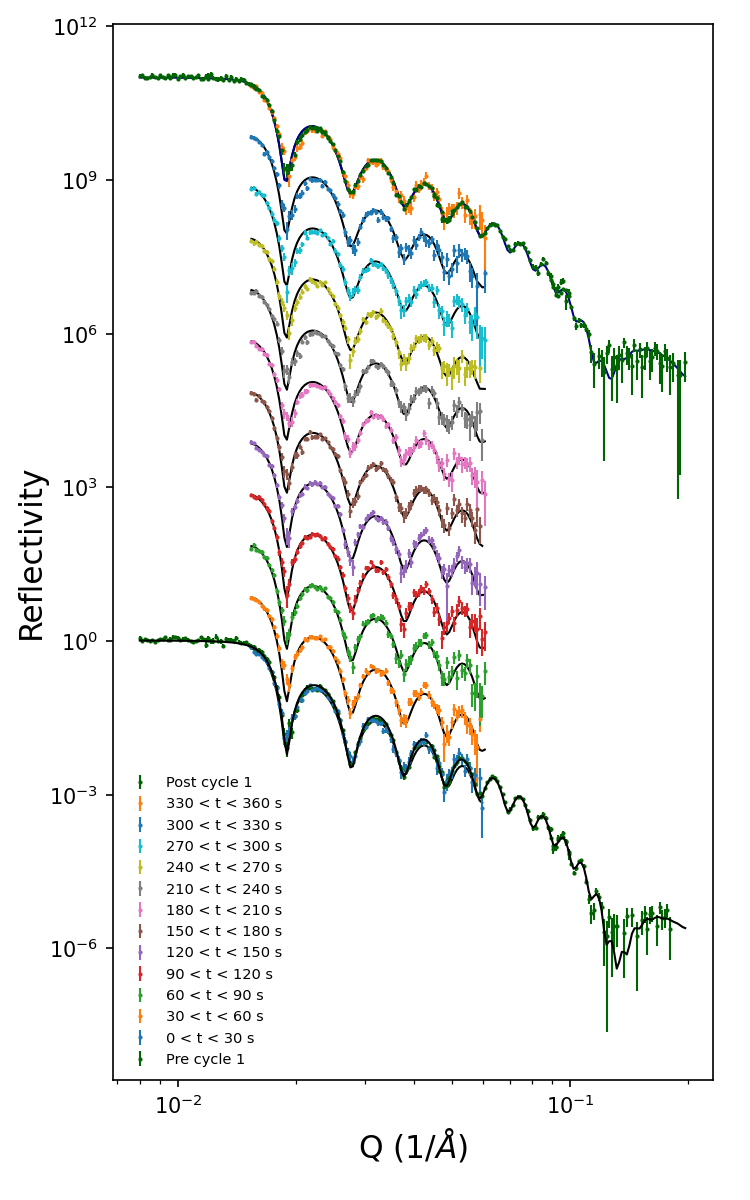

In [7]:
importlib.reload(summary_plots)

file_list = summary_plots.plot_dyn_data(dynamic_run, 207194, 207202, first_index=0, last_index=12, delta_t=30, model_name='model-loop-207201',
                                        fit_dir=fit_dir, ar_dir=ar_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir)

/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207194/__model-profile.dat
Processing: /SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207201-dyn/results-30s-bck/r207201_t000330/model-loop-207201.py
Read in /SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207201-dyn/results-30s-bck/r207201_t000330/model-loop-207201.py
Model: /SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207201-dyn/results-30s-bck/r207201_t000090/model-loop-207201
Z offset = -110.56;    Z_max = 807.6
Too many points: pruning down
MC file read: 0.0006253719329833984 sec
Done 4.087981700897217 sec
Processing: /SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207201-dyn/results-30s-bck/r207201_t000330/model-loop-207201.py
Read in /SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207201-dyn/results-30s-bck/r207201_t000330/model-loop-207201.py
Model: /SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207201-dyn/results-30s-bck/r207201_t000120/model-loop-207201
Z offset = -108.499;    Z_max = 805.

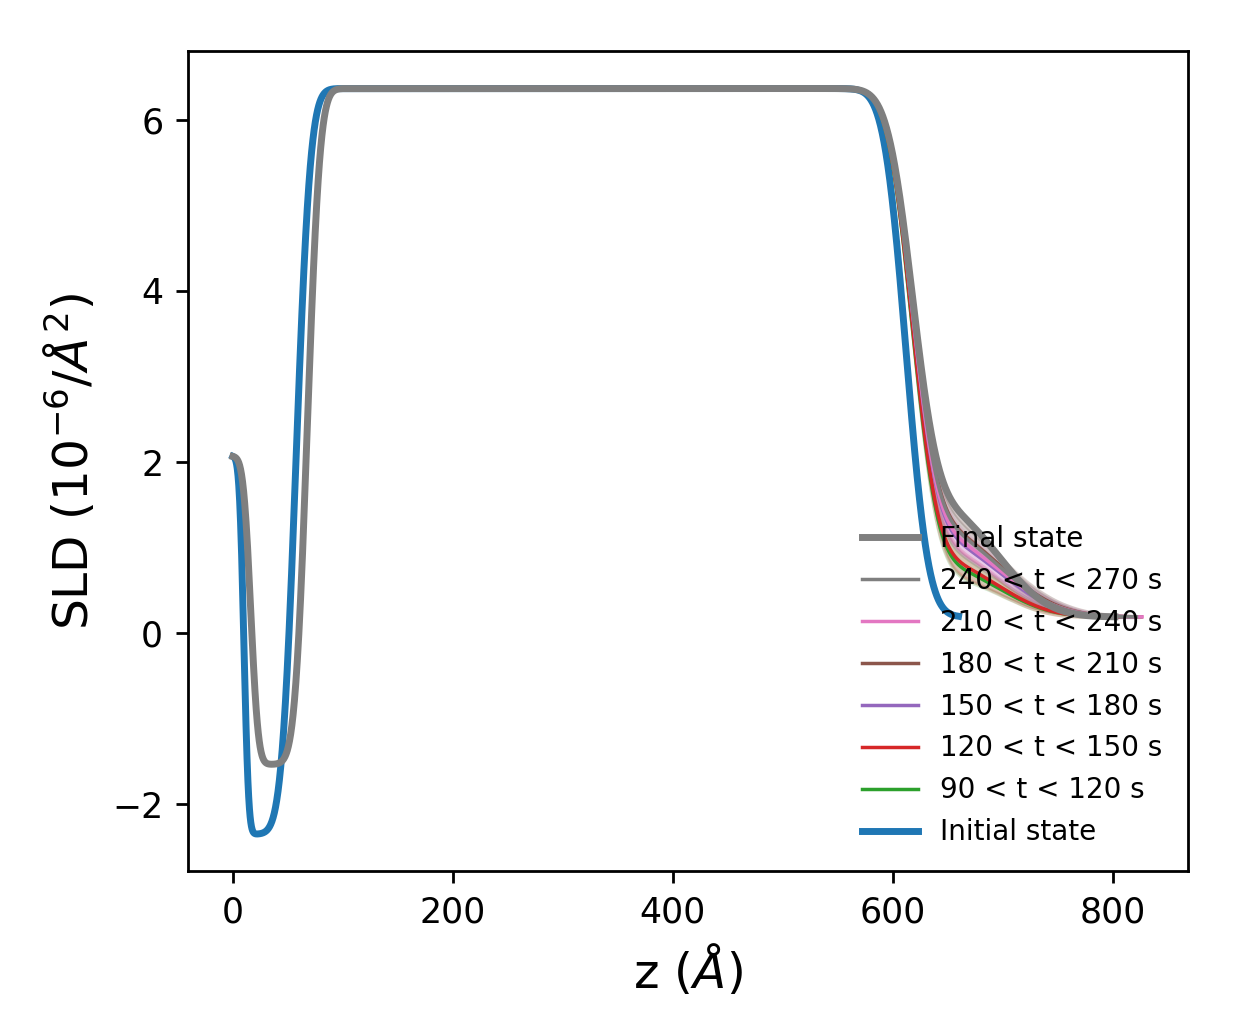

In [8]:
## Plot manual fits
importlib.reload(summary_plots)

# model_file = os.path.join(project_dir, 'model-207275.py')
model_file = os.path.join(dyn_fit_dir, str(file_list[-1][2]), 'model-loop-207201.py')

_file_list = [file_list[i] for i in [3,4,5,6,7,8]]

summary_plots.plot_dyn_sld(_file_list, 207194, 207202, 
                           fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, delta_t=30, 
                           show_cl=True, model_file=model_file, model_name='model-loop-207201', legend_font_size=8)

THF interface 15.861786534565136


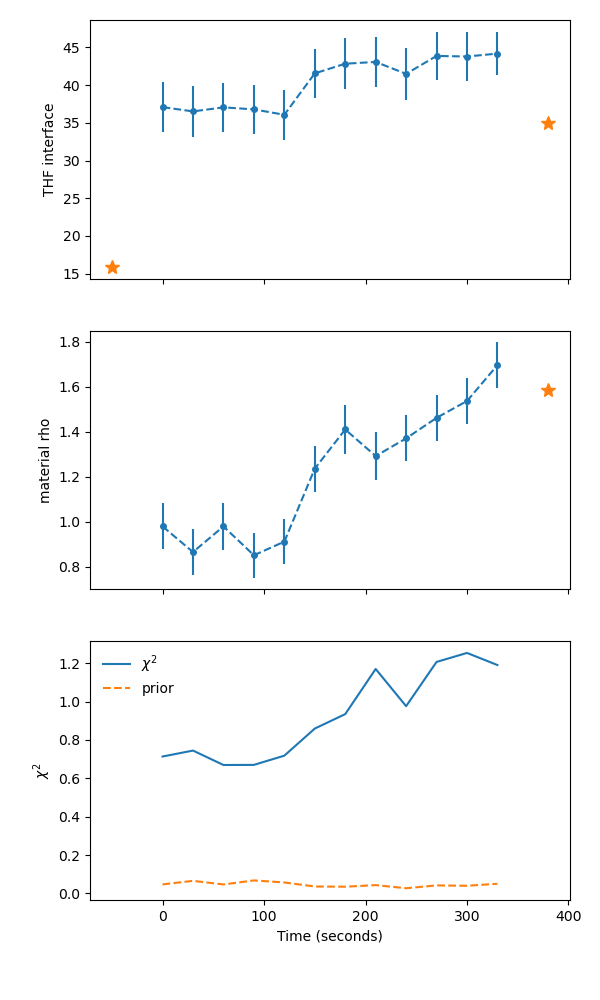

In [72]:
importlib.reload(summary_plots)

trend_values, trend_err = summary_plots.trend_data(file_list, 207194, 207202, 
                                                   fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                                                   model_name='model-loop-207201', model_file=None, add_plot=0)


In [42]:
importlib.reload(summary_plots)

trend_file = os.path.join(dyn_fit_dir, 'trend-model-loop-207201.json')
summary_plots.write_md_table(trend_file)


FileNotFoundError: [Errno 2] No such file or directory: '/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207201-dyn/results-30s-bck/trend-model-loop-207201.json'